<a href="https://colab.research.google.com/github/mahzze/Solucoes-notebooks-bcc/blob/main/atividades/Atividade_5_Regress%C3%A3o_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bases Computacionais da Ciência - Raphael Y. de Camargo - 2024.2

## Lista 5 - Entregar até o dia 14/08

Vamos criar os problemas baseados no arquivo `data_relations.csv` fornecido pelo Moodle. Para todos os problemas, você deverá primeiro fazer o upload do arquivo e leitura em um dataframe, conforme visto em aula.

In [1]:
import pandas as pd
from google.colab import files

arquivo = files.upload()
df = pd.read_csv("data_relations.csv")

Saving data_relations.csv to data_relations.csv


### Problema 1: Análise Descritiva

Realize uma análise descritiva dos dados para cada coluna. Calcule a média, mediana, desvio padrão, mínimo, máximo e quartis para as colunas "x", "y1", "y2" e "y3".

In [4]:
df[["x","y1", "y2", "y3"]].describe()

,x,y1,y2,y3
count,100.000000,100.000000,100.000000,100.000000
mean,0.059808,6.138574,2.261437,8.082598
std,1.012960,6.681186,3.319982,11.241734
min,-2.552990,-3.091690,-5.282544,-21.097036
25%,-0.643857,1.970264,0.350044,1.807220
50%,0.094096,3.711813,2.529160,5.580329
75%,0.737077,8.468270,4.433128,10.248202
max,2.269755,30.119616,9.692076,49.493594


### Problema 2: Boxplots
Gere gráficos do tipo boxplot para cada uma das colunas "y1", "y2" e "y3". Discuta a distribuição dos dados verificada.




<Axes: >

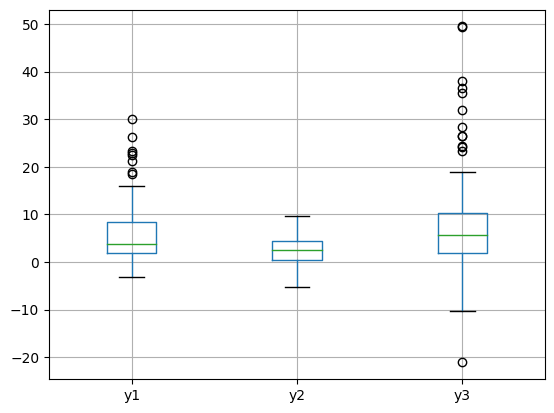

In [8]:
df.boxplot(column=["y1", "y2", "y3"])
# Os valores de y1, y2 e y3 ficam, em geral, entre 0 e 10, com limites próximos
# de 20 e -10 para y3, que apresenta a maior variação em relação à faixa de distribuição.
# y1 e y3 apresentam diversos outliers (as bolinhas).

### Problema 3: Regressão Polinomial

Para as três variáveis ("y1", "y2" e "y3"), gere um gráfico de dispersão para cada e insira uma o polinômio com o grau que melhor se ajusta para cada uma destas variáveis, com relação ao "x".

In [29]:
import matplotlib.pyplot as plt
import numpy as np
# um gráfico para cada
print(df["x"].describe()) #pela descrição: valores minimo e máximo de x: -2.55 e 2.27, logo dá pra usar nos gráficos
x= np.arange(-2.6, 2.5, 0.01)

count    100.000000
mean       0.059808
std        1.012960
min       -2.552990
25%       -0.643857
50%        0.094096
75%        0.737077
max        2.269755
Name: x, dtype: float64


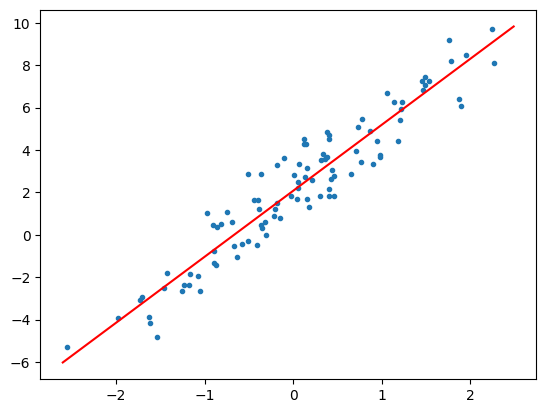

In [30]:
plt.plot(df["x"], df["y2"], ".") #linear
(a,b) = np.polyfit(x=df["x"], y=df["y2"], deg=1)
plt.plot(x, a*x+b, "-r")

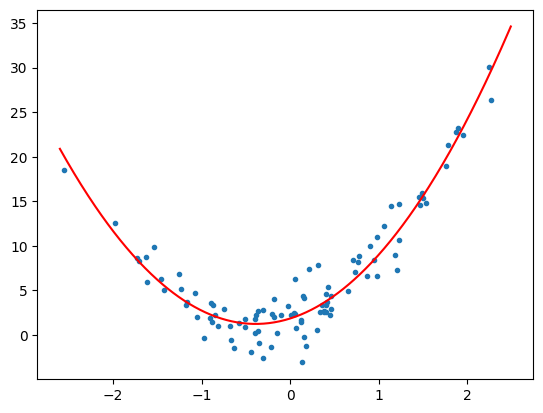

In [31]:
plt.plot(df["x"], df["y1"], ".") #quadratica
(a,b,c) = np.polyfit(x=df["x"], y=df["y1"], deg=2)
plt.plot(x, a*x**2+b*x+c, "-r")

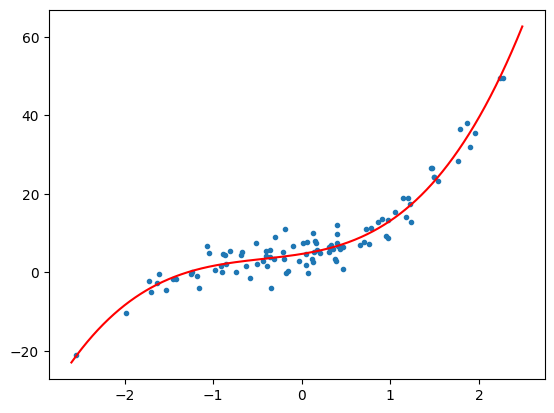

In [33]:
plt.plot(df["x"], df["y3"], ".") #cubica
(a,b,c,d) = np.polyfit(x=df["x"], y=df["y3"], deg=3)
plt.plot(x, a*x**3+b*x**2+c*x+d, "-r")

### Problema 4: Correlação

Calcule o *coeficiente de determinação* entre as variáveis "y1", "y2" e "y3" com a variável "x".

Note que no caso de regressão com polinômios de grau > 1, a fórmula de *coeficiente de determinação* = *correlação*$^2$ não se aplica.

In [47]:
# organizando por grau da predição
x = df["x"] #redefinindo x, pois x era um array de np.arange no exercicio anterior


############################# linear (y2)
coef_det_y2 = (df["y2"].corr(x))**2 #y2 tem grau = 1, logo a relação det = corr**2 vale
print("coeficiente de determinação y2 (linear):", coef_det_y2)

############################# quadrática (y1)
(a, b, c) = np.polyfit(x=df["x"], y=df["y1"], deg=2)
pred_y1 = a*x**2 + b*x + c
diff_y1 = (df["y1"] - pred_y1)**2
media_y1 = df["y1"].mean()
diff_media_y1 = (diff_y1 - media_y1)**2
coef_det_y1 = 1- diff_y1.sum()/diff_media_y1.sum()

print("coeficiente de determinação y1 (quadrática):", coef_det_y1)

############################# cúbica (y3)
(a, b, c, d) = np.polyfit(x=df["x"], y=df["y3"], deg=3)
pred_y3 = a*x**3 + b*x**2 + c*x + d
diff_y3 = (df["y3"] - pred_y3)**2
media_y3 = df["y3"].mean()
diff_media_y3 = (diff_y3 - media_y3)**2
coef_det_y3 = 1- diff_y3.sum()/diff_media_y3.sum()

print("coeficiente de determinação y2 (cúbica):", coef_det_y3)

coeficiente de determinação y2 (linear): 0.9031189274088612
coeficiente de determinação y1 (quadrática): 0.9006314468570246
coeficiente de determinação y2 (cúbica): 0.9317795643961494


### Problema 5: Interpretação dos resultados

Interprete as análises realizadas com as variáveis y1", "y2" e "y3"  com relação a "x". Para tal, combine os gráficos do Problema 3 com os resultados do numéricos do Problema 4.



In [ ]:
# Analisando os coeficientes de determinação (cdet) e os gráficos, os valores de cdet obtidos são condizentes,
# e apresentam desvios de aproximadamente 10% para y1 e y2, e de aproximadamente 7% para y3.